# **DETECCIÓN DE EMOCIONES CON REDES NEURONALES**

![Imagen](https://lh6.googleusercontent.com/proxy/vnZq8yxjlKWOnh_7KDmBgL5kQinQ3_z10rsWfuBDiIFh50tiME85wX93LjNVETPeIkEx_6JCgxa6-yoEZx9c9z_NK3M-pp4vP-X-PT5nJoxO6YRHXfY5mmZVy4O10bDU4fX2kG-GFe6yhsAQ6w0phg)

## Dataset Utilizado

El dataset utilizado para este proyecto es el siguiente:

- **Origen**: [Face Expression Recognition Dataset en Kaggle](https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset/code?datasetId=99505&sortBy=dateCreated)
- **Plataforma**: Kaggle

## Tipos de Emociones en la Clasificación:

En la clasificación de emociones se incluyen los siguientes tipos:

- **Enojado**: angry
- **Asco**: disgust
- **Miedo**: fear
- **Feliz**: happy
- **Neutral**: neutral
- **Triste**: sad
- **Sorpresa**: surprise

## Revisión de Bibliotecas Utilizadas

Para verificar las bibliotecas utilizadas en este proyecto, se ejecuta el siguiente comando en el entorno de Python:

```bash
!pip list


In [4]:
!pip list

Package                 Version
----------------------- -----------
absl-py                 0.15.0
astunparse              1.6.3
cachetools              5.3.3
certifi                 2022.12.7
charset-normalizer      3.3.2
cycler                  0.11.0
flatbuffers             1.12
gast                    0.3.3
google-auth             2.29.0
google-auth-oauthlib    0.4.6
google-pasta            0.2.0
grpcio                  1.32.0
h5py                    2.10.0
idna                    3.7
importlib-metadata      6.7.0
imutils                 0.5.4
Keras                   2.4.3
Keras-Preprocessing     1.1.2
kiwisolver              1.4.5
Markdown                3.4.4
MarkupSafe              2.1.5
matplotlib              3.2.2
numpy                   1.19.5
oauthlib                3.2.2
opencv-python           4.9.0.80
opt-einsum              3.3.0
pip                     22.3.1
protobuf                3.20.3
pyasn1                  0.5.1
pyasn1-modules          0.3.0
pyparsing           

## Definición de las Rutas del Dataset

En esta sección, se definen las rutas donde se encuentran los conjuntos de datos de entrenamiento y validación.

- **Directorio de Datos de Entrenamiento**: `train_data_dir = 'DataBases/EmocionesFaces/images/train'`
  - Esta variable `train_data_dir` almacena la ruta del directorio que contiene las imágenes utilizadas para entrenar el modelo. 

- **Directorio de Datos de Validación**: `val_data_dir = 'DataBases/EmocionesFaces/images/validation'`
  - La variable `val_data_dir` contiene la ruta del directorio que alberga las imágenes utilizadas para validar el rendimiento del modelo durante el entrenamiento.

In [5]:
train_data_dir = 'DataBases/EmocionesFaces/images/train/'
val_data_dir = 'DataBases/EmocionesFaces/images/validation/'

## Configuración del Dataset

En esta sección, configuramos diversos parámetros importantes relacionados con el dataset:

1. **Tamaño de las Imágenes**: Se define el tamaño de las imágenes que se utilizarán para el entrenamiento y la validación del modelo.

2. **Número de Clases**: Se especifica el número total de clases o categorías en las que se clasifican las imágenes del dataset.

3. **Etiquetas de las Clases**: Se definen las etiquetas correspondientes a cada una de las clases presentes en el dataset.

4. **Número de Épocas**: Se determina el número de épocas que se utilizarán durante el entrenamiento del modelo. Una época es una pasada completa a través de todo el dataset de entrenamiento.

5. **Batch Size**: Se establece el tamaño del lote (batch size), es decir, el número de muestras de entrenamiento que se propagarán a través de la red neuronal en una iteración.

Finalmente, se procede a configurar el dataset utilizando los parámetros definidos anteriormente.


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definimos algunos parámetros importantes
width_shape = 48
height_shape = 48
num_classes = 7
epochs = 50
batch_size = 32
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Configuramos el dataset de entrenamiento y validación
train_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()

# Generador de datos de entrenamiento
train_generator = train_datagen.flow_from_directory(  
    train_data_dir,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=True,
    classes=class_names
)

# Generador de datos de validación
val_generator = val_datagen.flow_from_directory(  
    val_data_dir,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=True,
    classes=class_names
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


## Modelo CNN

En esta sección, se define la arquitectura del modelo Convolutional Neural Network (CNN) que se utilizará para el procesamiento de las imágenes.

La CNN es una arquitectura de red neuronal profunda especialmente diseñada para el procesamiento de imágenes. Consiste en capas convolucionales que aplican filtros a las imágenes de entrada para extraer características relevantes, seguidas de capas de agrupación que reducen la dimensionalidad de las características extraídas. Finalmente, se agregan capas densas para clasificar las características extraídas en las diferentes clases de salida.

La definición de la arquitectura del modelo CNN incluirá la configuración de las capas convolucionales, de agrupación y densas, así como la función de activación utilizada en cada capa y la función de pérdida que se optimizará durante el entrenamiento del modelo.


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam

# Definimos la arquitectura del modelo CNN
model = Sequential()

## Extracción de Características
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(width_shape, height_shape, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

## Clasificación
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

# Revisamos el resumen del modelo CNN
model.summary()

# Compilamos el modelo
opt = Adam(learning_rate=1e-4)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 24, 24, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 6, 6, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,706,759 (6.51 MB)

 Trainable params: 1,704,007 (6.50 MB)

 Non-trainable params: 2,752 (10.75 KB)

## Configuración de TensorBoard

En esta sección, se detalla la configuración de TensorBoard, una herramienta de visualización proporcionada por TensorFlow para el monitoreo y análisis del rendimiento de modelos de aprendizaje automático.

TensorBoard permite visualizar métricas de rendimiento, gráficos de entrenamiento, distribuciones de parámetros y más, lo que facilita la comprensión y el ajuste de los modelos durante el proceso de entrenamiento.

La configuración de TensorBoard generalmente implica la definición de callbacks en el entrenamiento del modelo para registrar los datos relevantes en un directorio específico, que luego pueden ser visualizados usando la interfaz de TensorBoard.

In [11]:
# Importar las bibliotecas necesarias
from tensorflow.keras.callbacks import TensorBoard
import datetime
import os

# Cargar la extensión de TensorBoard para visualización
%load_ext tensorboard

# Directorio de registros para TensorBoard
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

# Callback de TensorBoard para registrar información de entrenamiento
tensorboard_callback = TensorBoard(log_dir=logdir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


## Entrenamiento del Modelo

En esta sección, se lleva a cabo el entrenamiento del modelo de aprendizaje automático configurado previamente. El entrenamiento del modelo implica el ajuste de los parámetros del modelo utilizando datos de entrenamiento para minimizar una función de pérdida específica.

Durante el proceso de entrenamiento, el modelo iterativamente hace predicciones sobre los datos de entrenamiento, compara las predicciones con las etiquetas verdaderas y actualiza los pesos del modelo en función de la discrepancia entre las predicciones y las etiquetas. Este proceso continúa durante un número específico de épocas o hasta que se alcanza un criterio de convergencia predefinido.

El rendimiento del modelo durante el entrenamiento se puede monitorear utilizando diversas métricas, como la precisión y la pérdida. Estas métricas se pueden registrar y visualizar utilizando herramientas como TensorBoard para evaluar y mejorar el rendimiento del modelo a lo largo del tiempo.


In [13]:
# Entrenamiento del modelo
model.fit(  
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    steps_per_epoch=train_generator.n//batch_size,
    validation_steps=val_generator.n//batch_size,
    callbacks=[tensorboard_callback])

Epoch 1/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 89s 98ms/step - accuracy: 0.3413 - loss: 1.6806 - val_accuracy: 0.3685 - val_loss: 1.6930
Epoch 2/50
  1/900 ━━━━━━━━━━━━━━━━━━━━ 1:07 75ms/step - accuracy: 0.5312 - loss: 1.2825

C:\Users\ferna\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 664us/step - accuracy: 0.5312 - loss: 0.6420 - val_accuracy: 0.2692 - val_loss: 0.9796
Epoch 3/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 86s 96ms/step - accuracy: 0.3782 - loss: 1.5953 - val_accuracy: 0.4366 - val_loss: 1.4821
Epoch 4/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 646us/step - accuracy: 0.4688 - loss: 0.8380 - val_accuracy: 0.6154 - val_loss: 0.6263
Epoch 5/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 85s 94ms/step - accuracy: 0.4124 - loss: 1.5261 - val_accuracy: 0.4656 - val_loss: 1.3842
Epoch 6/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 714us/step - accuracy: 0.4375 - loss: 0.5904 - val_accuracy: 0.5769 - val_loss: 0.5801
Epoch 7/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 85s 94ms/step - accuracy: 0.4386 - loss: 1.4605 - val_accuracy: 0.4528 - val_loss: 1.4426
Epoch 8/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 0.4062 - loss: 0.7903 - val_accuracy: 0.5000 - val_loss: 0.5805
Epoch 9/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 85s 95ms/step - accuracy: 0.4481 - loss: 1.4306 - val_accurac

## Curvas de Entrenamiento

En esta sección, se analizan las curvas de entrenamiento del modelo de aprendizaje automático. Las curvas de entrenamiento proporcionan información importante sobre el rendimiento y la convergencia del modelo durante el proceso de entrenamiento.

Las curvas de entrenamiento típicamente muestran la evolución de métricas clave, como la pérdida (loss) y la precisión (accuracy), en función del número de épocas. Estas métricas se calculan tanto para el conjunto de datos de entrenamiento como para el conjunto de datos de validación.

El análisis de las curvas de entrenamiento puede proporcionar información valiosa sobre el rendimiento del modelo, incluyendo la rapidez con la que el modelo converge, si está sobreajustando (overfitting) o subajustando (underfitting), y si es necesario ajustar la configuración del modelo, la tasa de aprendizaje u otras hiperparámetros para mejorar su rendimiento.

Se pueden utilizar herramientas como TensorBoard para visualizar y analizar las curvas de entrenamiento de manera eficiente durante el proceso de entrenamiento y ajuste del modelo.


In [5]:
%tensorboard --logdir logs

UsageError: Line magic function `%tensorboard` not found.


## 8. Guardado del Modelo

En esta etapa, procedemos a guardar nuestro modelo entrenado. El guardado del modelo es una parte crucial del proceso de desarrollo de modelos de aprendizaje automático, ya que nos permite conservar el estado del modelo después del entrenamiento para su posterior uso en la inferencia o para continuar con el entrenamiento en el futuro.

El guardado del modelo puede realizarse en varios formatos, dependiendo de las necesidades y requisitos específicos del proyecto. Los formatos comunes incluyen el formato HDF5 (Hierarchical Data Format version 5) y el formato SavedModel de TensorFlow.

Al guardar el modelo, podemos conservar tanto la arquitectura del modelo como los pesos aprendidos durante el entrenamiento, lo que nos permite replicar exactamente el mismo modelo en el futuro.

Además, el modelo guardado puede ser distribuido y compartido con otros para su uso en diferentes aplicaciones o entornos de producción.

In [16]:
# Renombrar el modelo antes de guardarlo
model.name = "detectionfacesemotion"
# Guardar el modelo con el nuevo nombre
model.save("detectionfacesemotion.h5")

In [17]:
from tensorflow.keras.models import save_model

# Renombrar el modelo antes de guardarlo
model.name = "detectionfacesemotion"
# Guardar el modelo con el nuevo nombre en el formato nativo de Keras
save_model(model, "detectionfacesemotion.keras")

## 9. Evaluación del Modelo

En esta etapa, procedemos a la evaluación del modelo entrenado utilizando un conjunto de datos de prueba independiente. La evaluación del modelo es crucial para comprender su rendimiento en datos no vistos y para identificar posibles áreas de mejora.

Durante la evaluación del modelo, utilizamos el conjunto de datos de prueba para hacer predicciones utilizando el modelo entrenado y luego comparamos las predicciones con las etiquetas verdaderas para calcular métricas de rendimiento, como la precisión, la recall, la F1-score y la matriz de confusión.

Estas métricas nos brindan información detallada sobre la capacidad del modelo para generalizar a datos nuevos y desconocidos. Además, nos permiten comparar el rendimiento del modelo con respecto a diferentes clases y identificar posibles desequilibrios en la precisión del modelo entre las clases.

La evaluación del modelo es esencial para validar su utilidad y confiabilidad en escenarios del mundo real y para tomar decisiones informadas sobre su implementación y despliegue.


In [19]:
# Cargar el modelo previamente entrenado
model = load_model("detectionfacesemotion.h5")

# Compilar el modelo para evitar la advertencia sobre las métricas compiladas
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
Clase predicha: happy


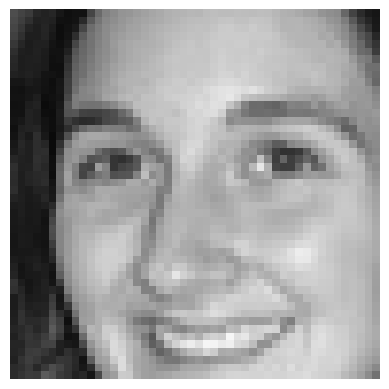

In [24]:
from tensorflow.keras.models import load_model
import cv2 
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

# Cargamos el modelo previamente entrenado
model = load_model("detectionfacesemotion.h5")

# Definimos la función para cargar y procesar la imagen
def preprocess_image(image_path, target_size=(48, 48)):
    # Cargar la imagen en escala de grises
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Redimensionar la imagen al tamaño requerido
    image = cv2.resize(image, target_size)
    # Convertir la imagen a un array y agregar una dimensión adicional
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    return image_array

# Definimos la lista de nombres de clases
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Definimos la ruta de la imagen
image_path = "DataBases/EmocionesFaces/images/validation/happy/14792.jpg"

# Preprocesamos la imagen
image = preprocess_image(image_path)

# Realizamos la predicción
preds = model.predict(image)

# Obtenemos la etiqueta de la clase predicha
predicted_class = class_names[np.argmax(preds)]

# Mostramos la etiqueta de la clase predicha y la imagen
print("Clase predicha:", predicted_class)
plt.imshow(cv2.imread(image_path), cmap='gray')
plt.axis('off')
plt.show()